<a href="https://colab.research.google.com/github/ArefNj/Computer-vision/blob/main/Yolov5_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install packages 
!python -m pip install --upgrade pip

%pip install tensorflow

%pip install tensorboard

In [1]:
import torch
print('GPU is', 'available' if torch.cuda.is_available() else "NOT AVAILABLE")
from IPython.display import Image

GPU is available


In [2]:
# clone model
# !git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt comet_ml  


d:\Tutorial\NN_DL_YT_maryam sadeghi\Yolov5_Object_detection\yolov5
Note: you may need to restart the kernel to use updated packages.


# Use pre-trained model


Use Yolov5s


In [3]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source "../TawheedTunnel.jpg"


detect: weights=['yolov5s.pt'], source=../TawheedTunnel.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'D:\Tutorial\NN_DL_YT_maryam': No such file or directory
YOLOv5  2024-9-4 Python-3.12.4 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)


  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  1%|          | 128k/14.1M [00:00<00:33, 444kB/s]
  2%|▏         | 256k/14.1M [00:00<00:23, 628kB/s]
  4%|▎         | 512k/14.1M [00:00<00:13, 1.04MB/s]
  5%|▌         | 768k/14.1M [00:00<00:11, 1.26MB/s]
  7%|▋         | 1.00M/14.1M [00:00<00:09, 1.43MB/s]
  9%|▉         | 1.25M/14

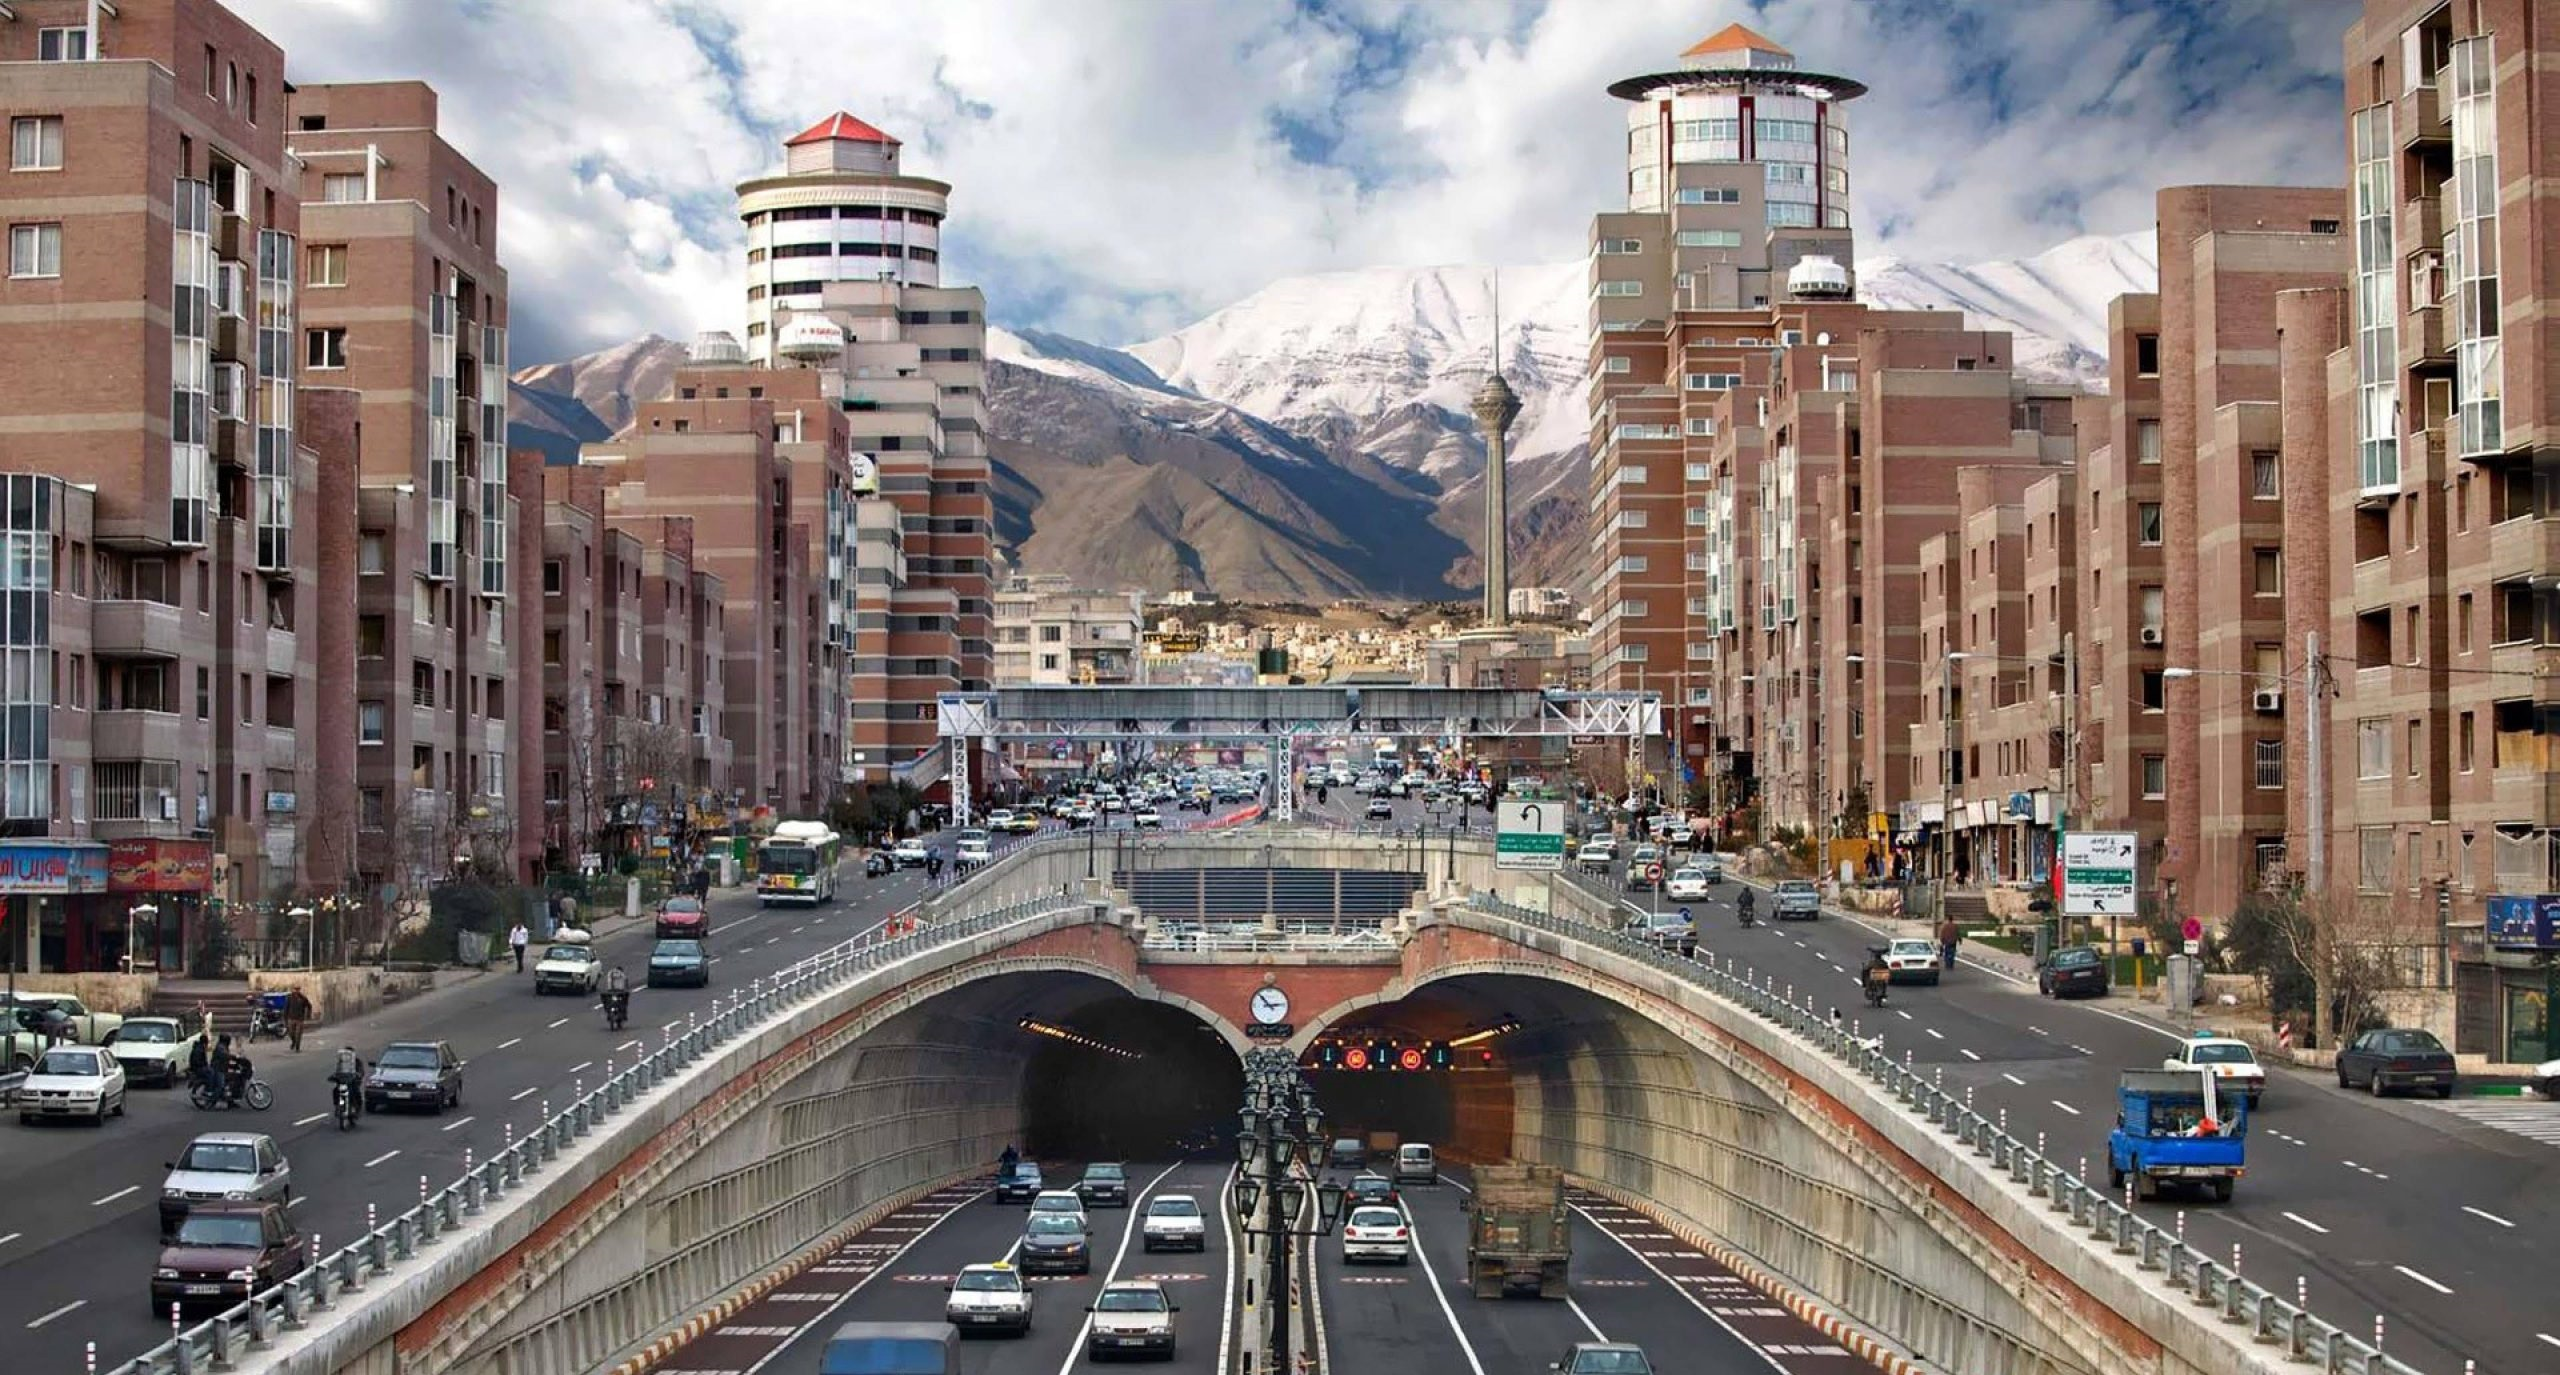

In [4]:
Image('../TawheedTunnel.jpg')

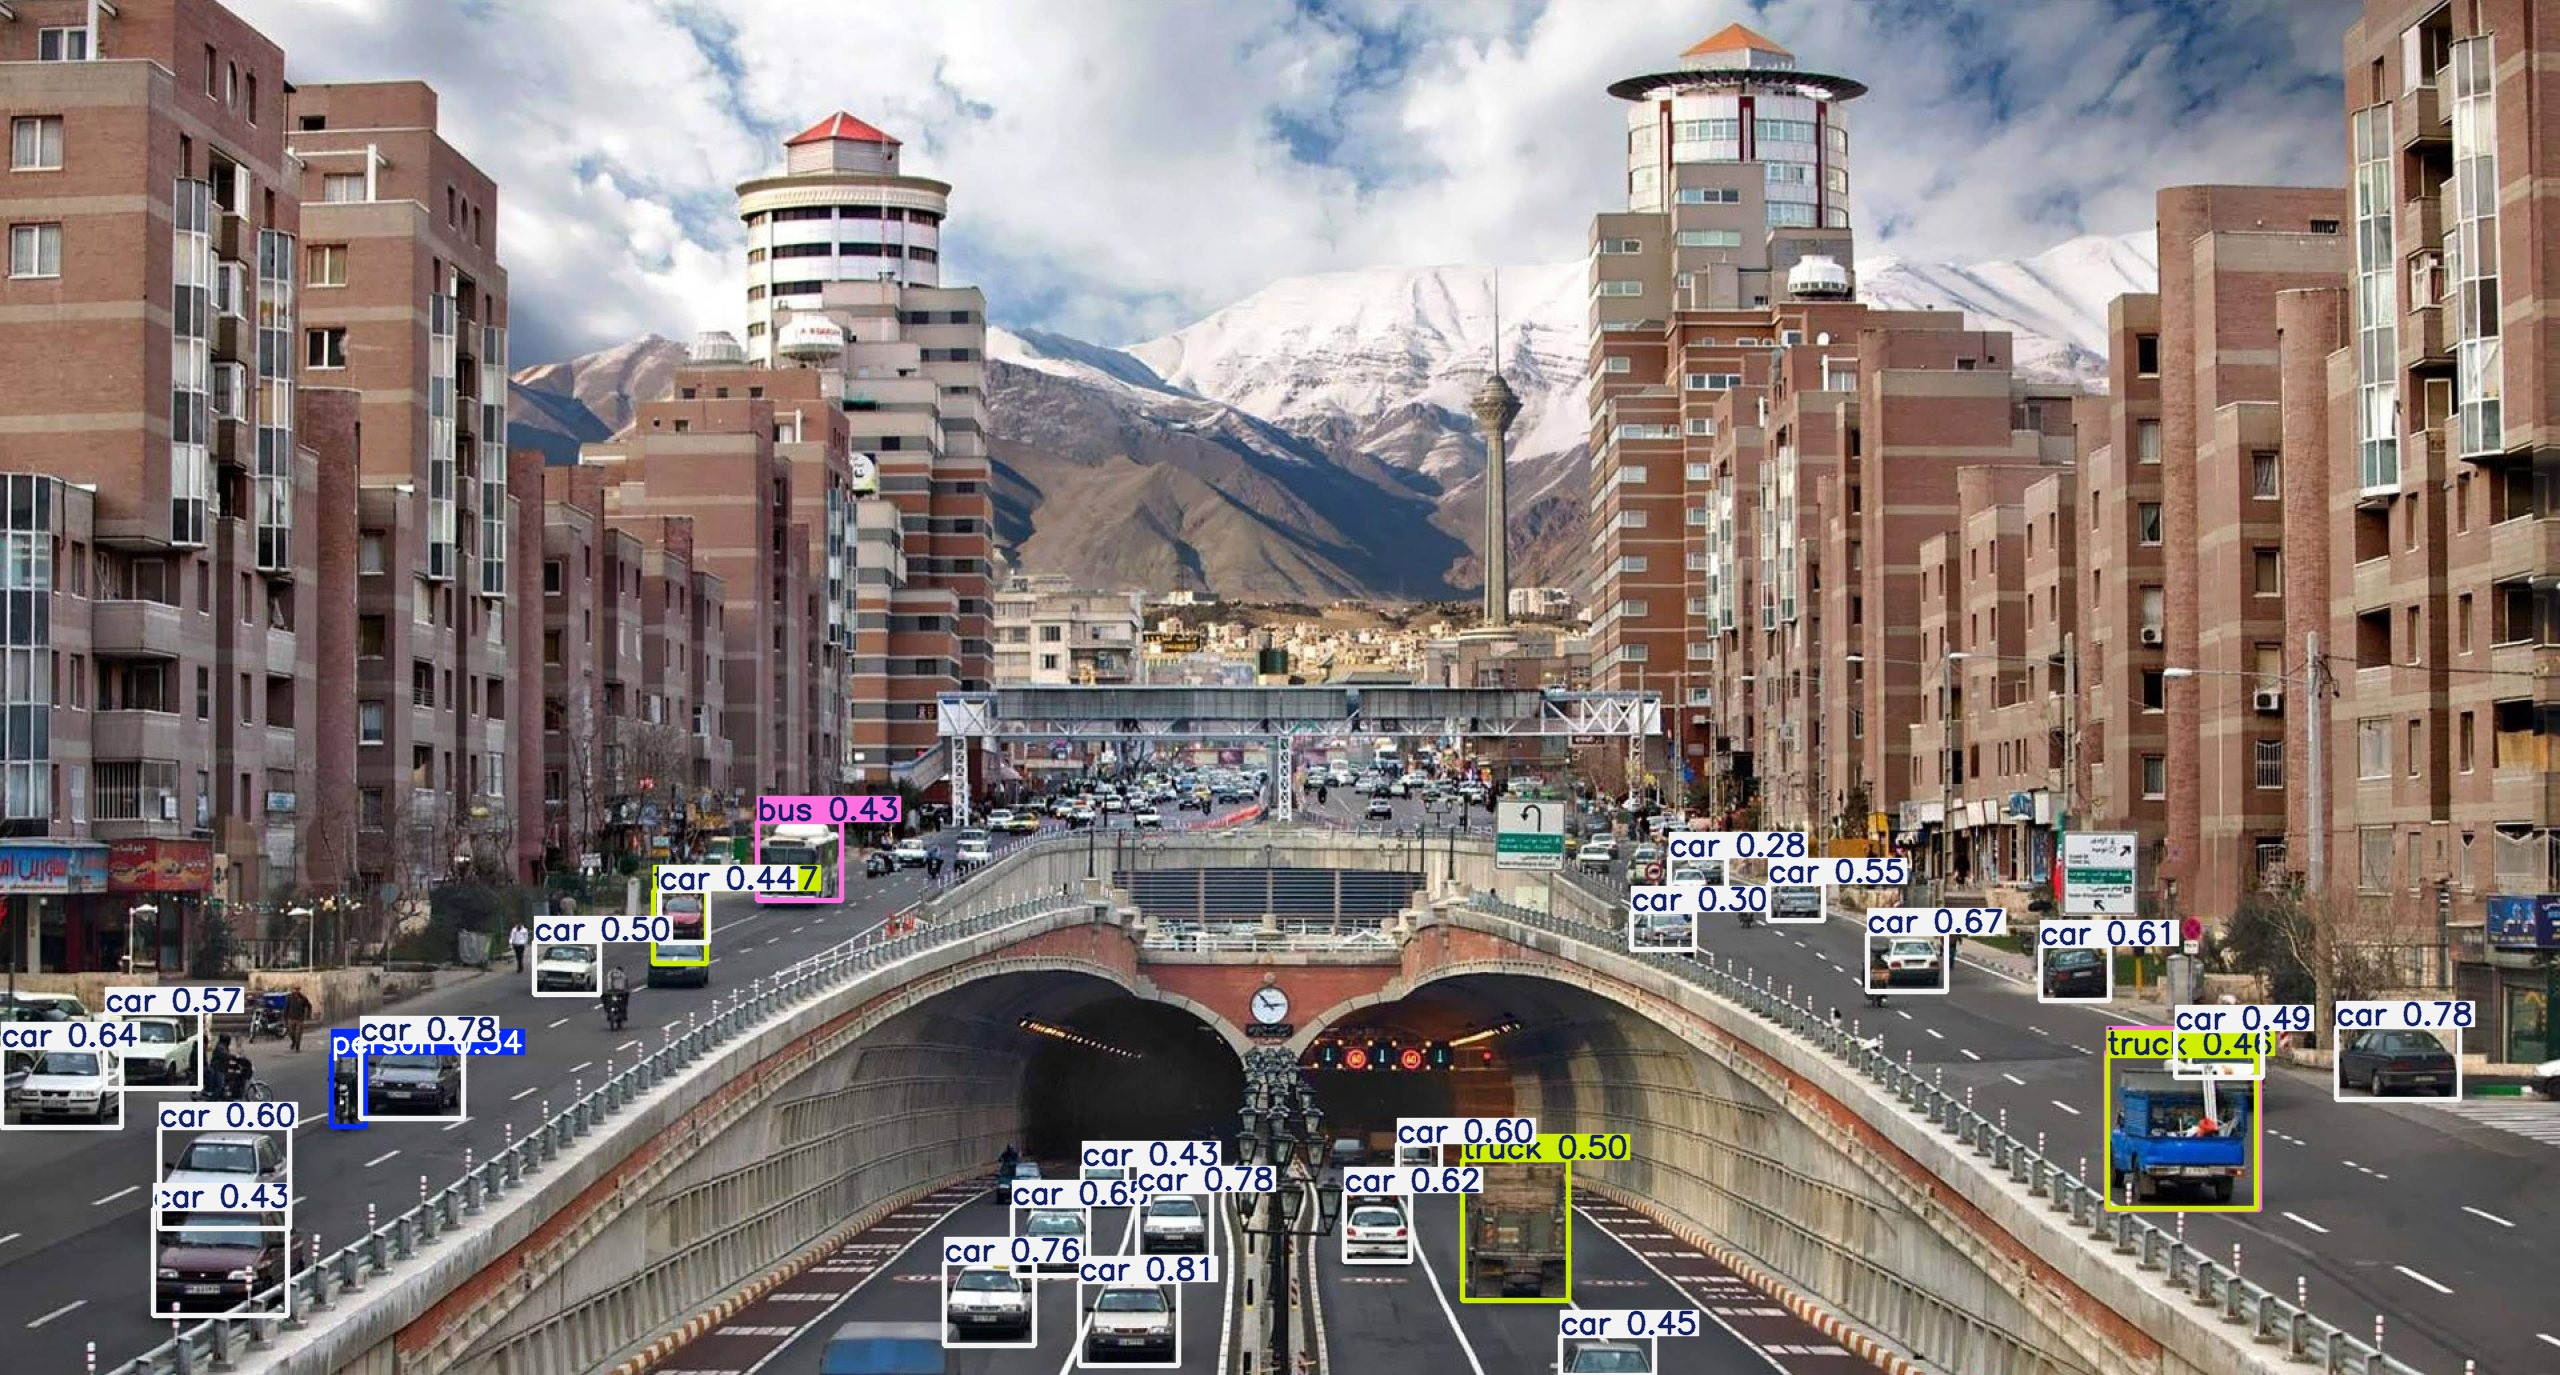

In [5]:

Image('runs/detect/exp/TawheedTunnel.jpg')

Change Threshold
Change model from yolov5s to yolov5m


In [6]:
!python detect.py --weights yolov5m.pt --img 640 --conf 0.5 --source "../TawheedTunnel.jpg"

detect: weights=['yolov5m.pt'], source=../TawheedTunnel.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to 'D:\Tutorial\NN_DL_YT_maryam': No such file or directory
YOLOv5  2024-9-4 Python-3.12.4 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)


  0%|          | 0.00/40.8M [00:00<?, ?B/s]
  0%|          | 128k/40.8M [00:00<01:43, 412kB/s]
  1%|          | 256k/40.8M [00:00<01:10, 602kB/s]
  1%|          | 512k/40.8M [00:00<00:41, 1.02MB/s]
  2%|▏         | 768k/40.8M [00:00<00:32, 1.28MB/s]
  2%|▏         | 1.00M/40.8M [00:00<00:29, 1.43MB/s]
  3%|▎         | 1.25M/40.

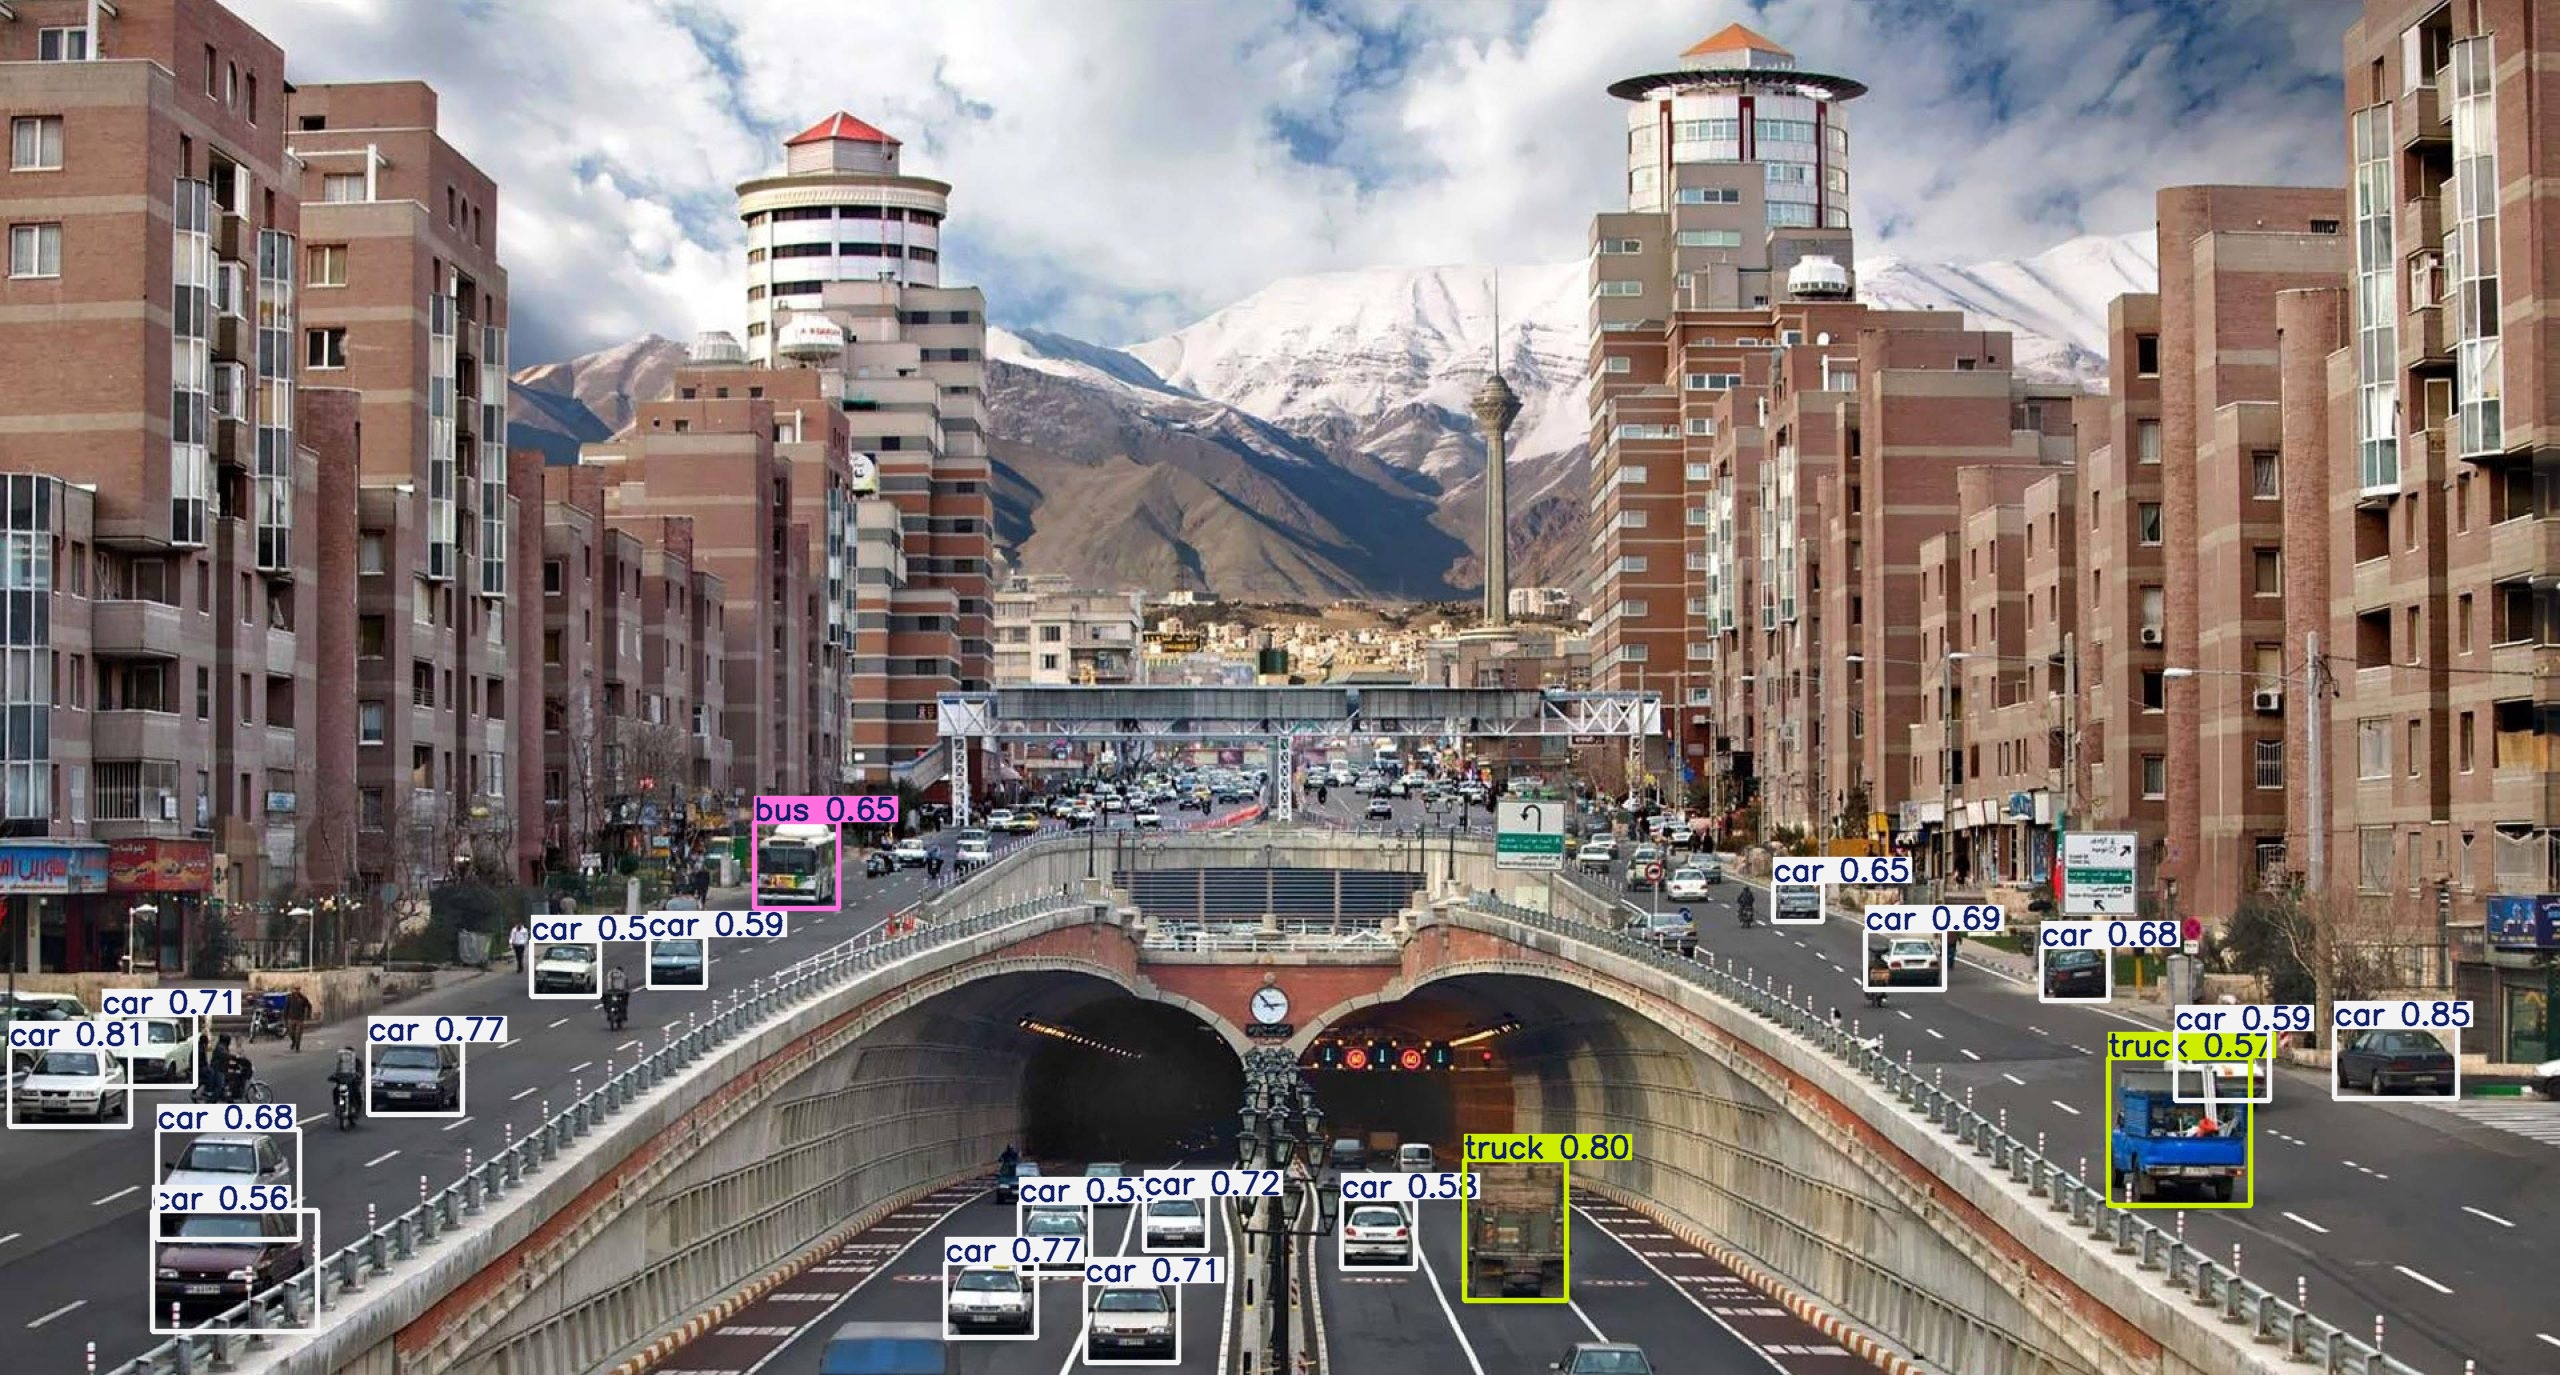

In [12]:
Image('runs/detect/exp2/TawheedTunnel.jpg')

## Import Dataset

In [13]:
import os
from random import choice
import shutil
%cd ..

d:\Tutorial\NN_DL_YT_maryam sadeghi\Yolov5_Object_detection


In [14]:
imgs =[]
xmls =[]

train_path = 'yolov5/data/images/train'
val_path = 'yolov5/data/images/val'
source_path = 'archive/ts/ts'

if not os.path.exists(train_path):
  os.mkdir(train_path)
if not os.path.exists(val_path):
  os.mkdir(val_path)

train_ratio = 0.8
val_ratio = 0.2

#total count of imgs
totalImgCount = len(os.listdir(source_path))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(source_path):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)

training images are :  592
Validation images are :  148


In [15]:
trainimagePath = 'yolov5/data/images/train'
trainlabelPath =  'yolov5/data/labels/train'
valimagePath = 'yolov5/data/images/val'
vallabelPath = 'yolov5/data/labels/val'

# make label directory to data directory

if not os.path.exists(trainimagePath):
  os.mkdir(trainimagePath)
if not os.path.exists(trainlabelPath):
  os.mkdir(trainlabelPath)
if not os.path.exists(valimagePath):
  os.mkdir(valimagePath)
if not os.path.exists(vallabelPath):
  os.mkdir(vallabelPath)

for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)


#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir

    shutil.copy(os.path.join(source_path, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(source_path, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(source_path, val_path) 

In [ ]:
# dataset.yaml file
# # train and val data
# train: ./images/train/
# val: ./images/val/

# # number of classes
# nc: 4

# # class names
# names: ['speed limit', 'danger', 'mandatory', 'other']

## Train model


In [3]:
# %cd yolov5
%run train.py --img 415 --batch 16 --epochs 30 --data data/dataset.yaml --weights yolov5s.pt --cache
     

train: weights=yolov5s.pt, cfg=, data=data/dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  2024-9-4 Python-3.12.4 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5,

In [15]:
%tensorboard --logdir runs

UsageError: Line magic function `%tensorboard` not found.


Test model


best weights


In [4]:
%run detect.py --source ../test.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=../test.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-9-4 Python-3.12.4 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\Tutorial\NN_DL_YT_maryam sadeghi\Yolov5_Object_detection\test.jpg: 416x640 1 speed limit, 1 danger, 42.0ms
Speed: 2.0ms pre-process, 42.0ms inference, 3.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


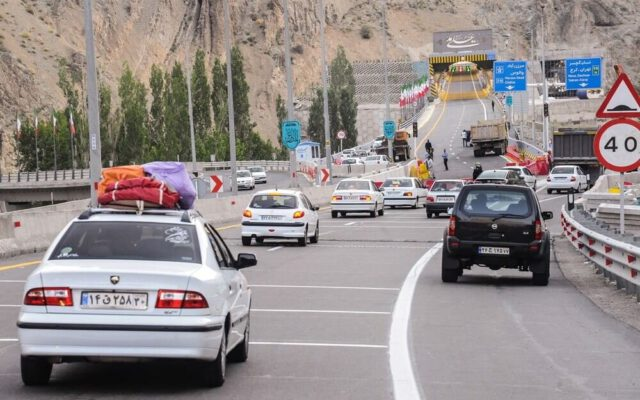

In [5]:
Image("../test.jpg")

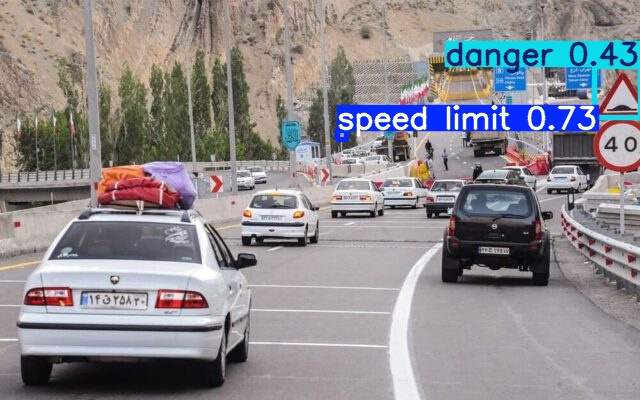

In [6]:
Image("runs/detect/exp3/test.jpg")

In [7]:
%run detect.py --source ../test.jpg --weights runs/train/exp/weights/last.pt

detect: weights=['runs/train/exp/weights/last.pt'], source=../test.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  2024-9-4 Python-3.12.4 torch-2.4.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 D:\Tutorial\NN_DL_YT_maryam sadeghi\Yolov5_Object_detection\test.jpg: 416x640 1 speed limit, 1 danger, 36.2ms
Speed: 2.0ms pre-process, 36.2ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp4


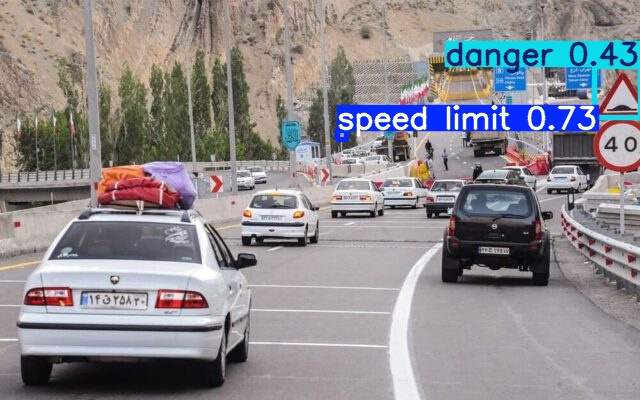

In [8]:
Image("runs/detect/exp4/test.jpg")